# Visualización de datos usando [Matplotlib](https://matplotlib.org/) 

## Introducción

Matplotlib es una librería de Python para hacer gráficos en dos dimensiones de alta calidad y altamente 
personalizables

Matplotlib se integra con NumPy y acepta el formato `ndarray`  en sus funciones

Matplotlib se integra con Jupyter mediante la magia `%matplotlib`, que nos permite seleccionar un backend para mostrar los gráficos 
    
- `inline` : Gráficos rasterizados en el notebook/lab
- `notebook` : Gráficos interactivos en el notebook
- `ipympl`: Gráficos interactivos en jupyter lab 
- `qt`, `gtk`, `osx` : Gráficos en una ventana emergente usando el *desktop environment* que tengamos instalado

Puedes consultar más información sobre esta magia en un terminal de IPython usando:

```python
%matplotlib?
```

**Instalación**
    
Con nuestro ambiente conda activado:

    conda install matplotlib
    
O si usamos jupyterlab/VSCode

    conda install matplotlib ipympl

**Importar**

In [2]:
# Invocamos la magia con una de las opciones
%matplotlib inline
# Importamos la librería
import matplotlib as mpl
display(mpl.__version__)
import matplotlib.pyplot as plt

'3.3.4'

El modulo `pyplot` provee 

- Funciones para crear distintos tipos de gráficos
- Una maquina de estados que añade los diversos elementos que queremos incluir en él

A continuación vamos a revisar ambos

## Nuestra primera figura en matplotlib

Sea los siguientes datos que representan el número de casos covid19 positivos totales desde el 22 de Enero de 2020 hasta el 13 de Mayo de 2020

In [3]:
import numpy as np
data_covid = np.genfromtxt('covid19_extract.csv', delimiter=',', names=True,
                           dtype= ['U50', 'U50', 'f8', 'f8'] + ['i4']*100)
data_argentina = np.array([data_covid[0][i] for i in range(4,len(data_covid[0]))])
data_bolivia = np.array([data_covid[1][i] for i in range(4,len(data_covid[1]))])
data_brazil = np.array([data_covid[2][i] for i in range(4,len(data_covid[2]))])
data_chile = np.array([data_covid[3][i] for i in range(4,len(data_covid[3]))])
display(data_chile)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     1,     4,     4,
           4,     8,     8,    13,    23,    23,    43,    61,    74,
         155,   201,   238,   238,   434,   537,   632,   746,   922,
        1142,  1306,  1610,  1909,  2139,  2449,  2738,  3031,  3404,
        3737,  4161,  4471,  4815,  5116,  5546,  5972,  6501,  6927,
        7213,  7525,  7917,  8273,  8807,  9252,  9730, 10088, 10507,
       10832, 11296, 11812, 12306, 12858, 13331, 13813, 14365, 14885,
       16023], dtype=int32)

Una linea en matplotlib se dibuja con la función `plot`

Por ejemplo

```python
>>> plt.plot(a)
```

dibujará $a$ en el eje vertical y `range(len(a))` en el eje horizontal

Mientras que

```python
>>> plt.plot(x, y)
```
    
dibujará $y$ en el eje vertical y $x$ en el eje horizontal


```{note}
Usamos un gráfico de linea para estudiar como cambia una variable en función de otra o en función del tiempo (orden)
```

In [ ]:
plt.plot(data_chile);

Podemos especificar el color, ancho, estilo, transparencia, entre otros:

In [ ]:
plt.plot(data_argentina, color='r', linestyle='--',  linewidth=2, alpha=0.5);

Notar que en IPython llamar a `plot` genera inmediatamente la figura. Si se usa el intérprete normal de Python la figura se mostrará usando `plt.show()`


```{note}
Se se usa el backend notebook o ipympl se añade una barra de herramientas que permite manipular interactivamente el gráfico 
```

## Creación de figuras y ejes

- Figura (Figure): Es el elemento principal, actua como un lienzo que mantiene los demás elementos
- Ejes (Axes): 
    - Representan el sistema de coordenadas
    - Puede haber más de uno por figura
    - Se puede configurar su posición dentro de la figura.

Anteriormente, al llamar `plot` creamos automaticamente un eje y una figura

Para tener mayor control sobre nuestro gráfico podemos crear una figura y un conjunto de ejes usando `figure` o `subplots`


In [ ]:
# Especificamos el tamaño y el color de fondo
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='#EEF')
ax.plot(data_chile);

### Anatomía de un gráfico de Matplotlib

Se llama "artista" a los objetos que podemos dibujar en los ejes

Agregamos artistas y modificamos su apariencia usando las funciones de la clases `Axes`

La siguiente figura de la documentación de matplotlib resume los elementos principales que podemos modificar

<a href="https://matplotlib.org/examples/showcase/anatomy.html"><img src="https://matplotlib.org/_images/anatomy.png" width="600"></a>


El siguiente ejemplo muestra como 

1. Crear lineas de distintos tipos con y sin marcadores
1. Agregar un título y nombres para los ejes
1. Cambiar los límites, posición y razón de aspecto de los ejes
1. Cambiar la frecuencia y tamaño de los ticks de los ejes
1. Agregar una grilla
1. Agregar una leyenda

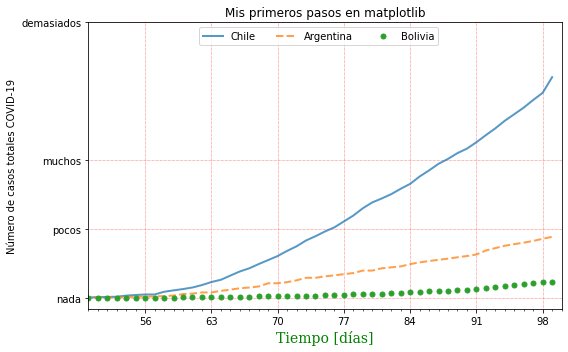

In [9]:
fig, ax = plt.subplots(figsize=(8, 5), tight_layout=True, facecolor='w')

ax.plot(data_chile, # datos
        linewidth=2, # Ancho de la linea
        alpha=0.75, # Opacidad
        label='Chile') # Etiqueta para la leyenda
ax.plot(data_argentina, 
        linestyle='--', # Estilo de la linea, las opciones son -, --, -., : y none
        linewidth=2, alpha=0.75, label='Argentina')
ax.plot(data_bolivia, 
        linestyle='none', # "Sin linea"
        marker='.', # Forma del marcador
        markersize=10, # Tamaño del marcador
        label='Bolivia')

# Leyenda
ax.legend(loc=1, ncol=3, bbox_to_anchor=(0.75, 1))

# Texto para ejes y título
ax.set_xlabel('Tiempo [días]', fontsize=14, fontname='serif', color="green")
ax.set_ylabel('Número de casos totales COVID-19')
ax.set_title('Mis primeros pasos en matplotlib')

# Límites de los ejes: set_xlim y set_ylim
ax.set_xlim([50, 100]) 

# Ticks de los ejes: set_xticks y set_yticks
ax.set_yticks([0, 5000, 10000, 20000])
# Etiquetas de los ejes
ax.set_yticklabels(['nada', 'pocos', 'muchos', 'demasiados'])
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))

# Grilla
ax.grid(color="red", which="major", axis='both', linestyle=':', linewidth=0.5)

### Posicionamiento de ejes

Creando un eje en una posición específica de la figura

La posición se indica con cuatro valores ordenados como sigue:

- left (izquierda)
- bottom (abajo)
- width (ancho)
- height (alto)

Los valores deben estar entre 0 y 1, son relativos al tamaño de la figura

In [ ]:
fig = plt.figure(figsize=(7, 4))
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(data_chile)
ax1.set_title('ax1')
ax2 = fig.add_axes([0.25, 0.5, 0.4, 0.2])
ax2.plot(data_argentina)
ax2.set_title('ax2');

Si queremos múltiples ejes organizados como una tabla es más sencillo usar `subplots`

Si queremos comparar todas las figuras en la misma escala se pueden usar los argumentos `sharex` y `sharey`

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(7, 5), 
                       sharex=True, sharey=False, tight_layout=True)
ax[0].plot(data_chile, lw=2)
ax[0].set_title('Chile')
ax[1].plot(data_argentina, lw=2)
ax[1].set_title('Argentina');
ax[2].plot(data_bolivia, lw=2)
ax[2].set_title('Bolivia');

Si necesitamos que los sub-ejes tengan distintos tamaños dentro de la "tabla" podemos utilizar `gridspec`

In [ ]:
fig = plt.figure(figsize=(7, 4), facecolor='w', tight_layout=True)

gs = mpl.gridspec.GridSpec(4, 4)

ax = fig.add_subplot(gs[0, 0])
ax.plot(data_chile); ax.set_title('0')
ax = fig.add_subplot(gs[1:, 0])
ax.plot(data_chile); ax.set_title('1')
ax = fig.add_subplot(gs[0:2, 1:])
ax.plot(data_chile); ax.set_title('2')
ax = fig.add_subplot(gs[2:4, 1:3])
ax.plot(data_chile); ax.set_title('3')
ax = fig.add_subplot(gs[2:4, 3])
ax.plot(data_chile); ax.set_title('4');

### Graficando en escala logarítmica

Podemos modificar el escalamiento de los ejes de un gráfico tipo `plot` usando `set_xscale` o `set_yscale`, respectivamente

También podemos obtener el mismo efecto usando `semilogx`, `semilogy` y `loglog`, en lugar de `plot`

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True, facecolor='w')

ax[0].plot(data_chile)
ax[1].plot(data_chile)
ax[1].set_yscale('log')

# plot y set_yscale es equivalente a:
# ax[1].semilogy(data_chile)

### Ejes compartidos

Se puede tener dos ejes de ordenadas (vertical) compartiendo un mismo eje de abscisas (horizontal) 

**Ojo:** Este tipo de visualización puede inducir a confusión, evítala a menos de que sea muy bien justificado

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
ax.plot(data_chile, c='green', lw=3, alpha=0.8)
ax.set_ylabel(r'Chile', color="green")

ax2 = ax.twinx()
ax2.plot(data_argentina, c='red', lw=3, alpha=0.8)
ax2.set_ylabel(r'Argentina', color="red");

### Anotaciones en un gráfico

Se puede usar `text` y `annotate` para agregar texto en posiciones arbitrarias


In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-5, 5, num=101)
ax.plot(x, np.exp(-x**2), c='blue')

ax.text(x=-4, y=0.1, # Posicion
        s="un ejemplo de texto flotante", # Texto
        fontsize=14, color='blue', family="serif", # Customización de la fuente
        rotation=45)

ax.annotate('annotate tiene más opciones', # String
            xy=(0, 1), xytext=(1, 1), # Posicionamiento del texto y la flecha
            fontsize=13, # Tamaño de letra
            arrowprops=dict(arrowstyle="<->")); # Estilo de la flecha

## Tipos de gráficos 

Hasta ahora sólo hemos usado la función `plot` para crear lineas. 

A continuación revisaremos otras opciones para crear gráficas usuales como nubes de puntos y mapas de contornos


### Nubes de puntos con `scatter`

Un gráfico de nube sirve para explorar si existe correlación entre dos conjuntos de datos

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(x=data_argentina, # Posición horizontal de los puntos
           y=data_chile, # Posición vertical de los puntos
           marker='o', # forma de los puntos
           s=200, # Tamaño de los puntos
           c='r', # Color de los puntos
           alpha=1.); # Opacidad de los puntos

También es posible especificar el tamaño y el color por punto en lugar de globalmente

Esto nos permite agregar más información al gráfico

En el siguiente ejemplo se utiliza el tamaño del punto para representar la cantidad total de casos y el color la fecha

In [ ]:
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)

ax.scatter(x=data_argentina,
           y=data_chile,  
           s=(data_argentina + data_chile)/50, # Cantidad total de casos (normalizado)
           c=np.arange(len(data_argentina)), # Días
           alpha=0.8);

Una nube de puntos también es útil si tenemos datos que son irregulares

El siguiente ejemplo corresponde al brillo de una estrella en función del tiempo, detectado por el telescopio [Vista](https://www.eso.org/public/teles-instr/paranal-observatory/surveytelescopes/vista/). Esta serie de tiempo se conoce como [**curva de luz**](https://es.wikipedia.org/wiki/Curva_de_luz)


En este ejemplo no se sabe como varía el brillo entre cada fecha por lo que no es correcto "conectar los puntos" con una linea

```{note}
Conocer la naturaleza de los datos es fundamental para poder graficarlos de la mejor forma
```

In [ ]:
tiempo, brillo, error = np.genfromtxt("rrl.dat")[:, :3].T

fig, ax = plt.subplots(2, figsize=(7, 4), tight_layout=True, sharex=True)

ax[0].plot(tiempo, brillo)
ax[0].set_title('Incorrecto, induce a confusión')
ax[1].scatter(tiempo, brillo)
ax[1].set_title('Correcto');
# Se puede obtener un resultado idéntico con:
#ax[1].plot(tiempo, brillo, 'o') 

### Linea con barras de error con `errorbar`

El gráfico de linea con barras de error es útil si queremos mostrar la incerteza asociada a nuestras variables. 

La función `errorbar` permite mostrar la incerteza de la variable dependiente (vertical) o independiente (horizontal)

La incerteza puede ser un número o un vector del mismo tamaño de la variable

Para la curva de luz anterior teníamos información sobre el error en el brillo (variable dependiente). Podemos agregarlo al gráfico con el argumento `yerr` como sigue

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)

ax.errorbar(x=tiempo, # Eje x
            y=brillo, # Eje y
            xerr=0.0, # Error en el eje x
            yerr=error, # Error en el eje y
            fmt='.', elinewidth=None, ecolor=None, capsize=None);


### Rangos de datos con `fill_between`


Este gráfico es útil si queremos
- presentar la incerteza asociada a la variable dependiente
- resumir el comportamiento de varios line plots


In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
data = np.vstack((data_chile, data_argentina, data_bolivia))
media = np.mean(data, axis=0)
devstd = np.std(data, axis=0)
ax.plot(media, label='Promedio de casos en Chile, Argentina y Bolivia')
ax.fill_between(x=range(len(media)),
                y1=media - devstd, 
                y2=media + devstd, 
                alpha=0.5, label='Desviación estándar')
ax.legend(loc=2);

### Lineas sobrepuestas con `stackplot`

Este gráfico sirve para estudiar la contribución de varias variables con respecto al valor total (suma)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
ax.stackplot(range(len(data_chile)), # Esto corresponde al eje horizontal
             data_chile, # Los siguientes datos se graficaran en el eje vertical
             data_argentina, 
             data_bolivia, 
             alpha=0.5, labels=('Chile', 'Argentina', 'Bolivia'));
plt.legend(loc=2);

### Barras con  `bar`

Un gráfico de barras sirve para comparar una cierta cantidad con respecto a distintos grupos

Por ejemplo

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.bar(x=range(3), # Posición de las barras
       height=[data_chile[-1], data_argentina[-1], data_bolivia[-1]], # Tamaño de las barras
       width=0.8, bottom=0, align='center', # Ancho y alineación de las barras
       color=None, edgecolor=None, linewidth=None); # Color y otros aspectos estéticos

ax.set_ylabel('Infectados totales a la fecha')
ax.set_xticks(range(3))
ax.set_xticklabels(['Chile', 'Argentina', 'Bolivia']);

### Histogramas con  `hist` 


Un histograma es una representación de la **distribución de una o más variables**

La construcción de un histograma involucra

- Medir el rango de la variable
- Dividir el rango en $N$ cajones
- Contar cuantas muestras corresponden a cada cajón

Por ejemplo

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

data = np.random.randn(100, 3) # Tres columnas de datos aleatorios
data[:, 1] *= 1.5 # La segunda columna tiene mayor dispersión
data[:, 2] += 2 # La tercera columna está desplazada en su media

ax.hist(data, # Matriz de datos
        bins=5, # Cantidad de cajones por columna
        range=(-5, 5), # Rango del histograma
        density=False, # Normalización 
        histtype='bar', color=None); # Aspectos visuales

# histype={'bar', 'barstacked', 'step',  'stepfilled'}

Un segundo ejemplo que muestra el histograma del brillo de la curva de luz

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), 
                       tight_layout=True, facecolor='w')

ax[0].errorbar(tiempo, brillo, error, fmt='.')
ax[0].set_ylabel('Brillo aparente')

ax[1].hist(brillo, bins=10, alpha=0.75, orientation="horizontal");
ax[1].set_title('Histograma');

### Diagrama de caja y bigote (boxplot)

Este gráfico se usa para visualizar y/o comparar la distribución de varios conjuntos de datos

- La linea naranja corresponde a la media de los datos
- La parte superior e inferior de la caja corresponden al  menor y mayor cuartil, respectivamente
- Los bigotes son el rango calculado a partir de los cuartiles
- Las pelotas son puntos fuera del rango anterior(outliers)


In [ ]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True)

ax.boxplot(data, notch=False, sym='o', 
           showmeans=None, showcaps=None, showbox=None);

### Mapas de colores

Para visualizar funciones que varían en dos variables independientes (por ejemplo una superficie) podemos usar **Mapas de colores**

Revisaremos las siguientes opciones

- `contour` y `contourf`
- `pcolor`
- `matshow` y `imshow`

En los mapas de colores la variable dependiente (áltura) se codifica como una escala o paleta de color

[Matplotlib](https://matplotlib.org/examples/color/colormaps_reference.html) ofrece varias paletas de color que se agrupan en tres tipos

- gradiente: Para representar variables continuas 
- divergentes: Para representar variables continuas con un valor cero
- categóricas: Para representar clases 


In [ ]:
scale = np.tile(np.linspace(0, 1, num=256), (20, 1))
fig, ax = plt.subplots(3, figsize=(7, 3), tight_layout=True)
for ax_, cmap_ in zip(ax, [plt.cm.Reds, # Esta es una escala tipo gradiente
                           plt.cm.RdBu, # Esta es de tipo divergente
                           plt.cm.Accent] # Esta es de tipo categórica
                     ):
    ax_.imshow(scale, cmap=cmap_)
    ax_.axis('off')

**Gráficas de contornos**

Creemos datos sintéticos tridimensionales para probar los mapas de colores

In [15]:
x = np.linspace(-3, 3, num=10)
X, Y = np.meshgrid(x, x)
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)

La función `contourf` crea un gráfico de contornos con el "relleno" coloreado

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contourf(X, Y, Z, # Los tres deben ser matrices
                    levels=6, # Permite ajustar la cantidad de escalones o niveles
                    cmap=plt.cm.Greens) # Paleta de colores

# Colorbar es útil para mostrar como varía la variable Z
fig.colorbar(mappable=cplot, ax=ax, orientation='vertical', pad=0.05); 

En cambio `contour` crea un mapa de contorno sin relleno

Se puede usar `clabel` para anotar el valor de los niveles de Z

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contour(X, Y, Z, levels=6, # Igual que en contourf
                   linewidths=2, linestyles='solid', # Aspectos visuales
                   cmap=plt.cm.Greens) # Paleta

ax.clabel(cplot, # Recibe el mapa de contornos
          colors='k', fontsize=10); # Aspectos tipográficos

**Visualizando matrices e imágenes**

Las funciónes `matshow` e `imshow` pueden usarse para visualizar arreglos. La primera es para matrices, es decir arreglos bidimensionales. La segunda es para imágenes, es decir arreglos tridimensionales donde la tercera dimensión es el canal de color (RGB)

Veamos primero `matshow`

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
cplot = ax.matshow(Z, # Matriz
                   cmap=plt.cm.Greens, # Paleta
                   interpolation='none') 
fig.colorbar(cplot);

El argumento interpolación controla la suavidad entre los "píxeles", las opciones son:

```python
interpolation = {'none', 'bilinear', 'bicubic', 'gaussian', 'lanczos'}
```

Por ejemplo

In [ ]:
fig, ax = plt.subplots(figsize=(5, 4), tight_layout=True)
cplot = ax.matshow(Z, cmap=plt.cm.Greens, interpolation='bicubic') 
fig.colorbar(cplot);

Para graficar imagenes es más conveniente usar `imshow`

Matplotlib también tiene la función `imread` para importar una imagen como ndarray

In [ ]:
img = plt.imread('img/valdivia.png')
fig, ax = plt.subplots(figsize=(7, 5), tight_layout=True)
ax.imshow(img);

## Gráficas en 3D

Otra opción para visualizar la interacción entre tres variables es usar gráficos 3D

- Es necesario importar el módulo `Axes3D`
- Luego podemos usar las funciones
    - `plot_surface`
    - `contour`, `contourf`
    - `plot_wireframe`
    
Por ejemplo:

In [20]:
ax.view_init?

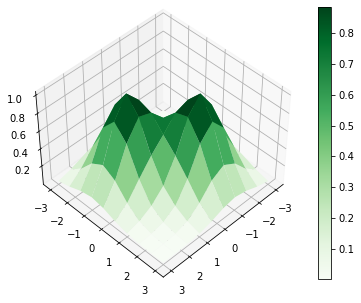

In [23]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

# Debemos indicar los ejes que son 3D
fig, ax = plt.subplots(figsize=(8, 5), 
                       subplot_kw={'projection': '3d'}) 

cplot = ax.plot_surface(X, Y, Z, cmap=plt.cm.Greens)
fig.colorbar(cplot)

# Podemos especificar el "ángulo de la cámara" con 
ax.view_init(45, # Elevación
             45 # Azimut 
            );

El módulo `Axes3D` puede usarse también para hacer líneas y nubes de puntos en 3D a partir de arreglos unidimensionales (vértices)

El siguiente ejemplo muestra una espiral en 3D creada usando coordenadas polares

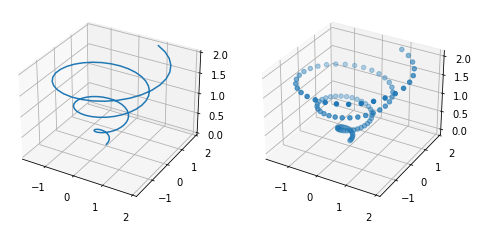

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5), 
                       subplot_kw={'projection': '3d'})

N = 100
rho = np.linspace(0, 2, num=N)
phi = np.linspace(0, 20, num=N)
x = rho*np.cos(phi)
y = rho*np.sin(phi)
z = np.linspace(0, 2, num=N)

ax[0].plot(x, y, z)
ax[1].scatter(x, y, z);

## Configurando matplotlib

Matplotlib mantiene un diccionario llamado `rcParams`

Puedes ver las opciones disponibles con

```python
mpl.rcParams
```

Si hay opciones que siempre vamos a ocupar conviene escribirlas aquí. 

Por ejemplo:

In [ ]:
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 12
mpl.rcParams['lines.marker'] = 'd'
mpl.rcParams['lines.markersize'] = 20
# Ya no es necesario indicar estas opciones en cada gráfica

x = np.arange(10)
plt.figure()
plt.plot(x, x**2) 
plt.plot(x, x**3);

También podemos escoger el estilo general de nuestras gráficas

Los estilos disponibles pueden revisarse con

```python
>>> sorted(mpl.style.available)
```

Por ejemplo

In [ ]:
plt.style.use('Solarize_Light2')

plt.figure()
x = np.arange(10)
plt.plot(x, x**2);

## ¿Cómo hacer buenas visualizaciones?

El objetivo de una visualización de datos es **comunicar la información de forma clara y simple**

> Esto tiene un aspecto funcional y otro estético que deben estar balanceados

En esta clase hemos aprendido a usar matplotlib: Corresponde al aspecto funcional

> El aspecto estético requiere diseño (y sentido común)

La mejor forma de aprender este aspecto es estudiando ejemplos

- https://informationisbeautiful.net/visualizations/
- https://bokeh.pydata.org/en/latest/docs/gallery.html

A continuación voy a listar algunos consejos de distintas fuentes

**Consejo 1:** El siguiente estudio realizó un ranking de las formas más efectivas de comunicar diferencias cuantitativas. Privilega las que están más arriba en la escala de efectividad

<a href="https://www.knowablemagazine.org/article/mind/2019/science-data-visualization"><img src="img/G-01-visual-ranking_4.svg" width="500"></a>

Les recomiendo tomar el *chart challenge* en el link de la imagen

**Consejo 2:** Menos es más. Muestra sólo lo fundamental y usa color sólo para comunicar

**Consejo 3**: Evita el misterio. Etiqueta tus ejes, ponle título a tus gráficos y usa leyendas siempre que sea necesario

**Consejo 4**: [Evita las paletas de color de tipo arcoíris](https://www.scientificamerican.com/article/end-of-the-rainbow-new-map-scale-is-more-readable-by-people-who-are-color-blind/). Las paletas de tipo arcoiris son más difíciles de interpretar y no son amigables con los daltónicos. Por esta razón la paleta por defecto de matplotlib es viridis que es [perceptualmente-uniforme](https://bids.github.io/colormap/)

Puedes ver estos y otros consejos explicados en el siguiente [diagrama](https://www.geckoboard.com/uploads/play-your-charts-right.pdf) de *geckoboard.com*

También les recomiendo ver el siguiente video (en inglés) con más ejemplos y buenas prácticas a considerar

In [ ]:
from IPython.display import VimeoVideo
VimeoVideo('29684853')

## Más allá de matplotlib

Existen muchas librerías de Python para hacer visualizaciones y gráficas. 

Matplotlib es la más utilizada pero dependiendo de las necesidades de tu experimento/aplicación te recomiendo que consideres las siguientes alternativas

- [Seaborn](https://seaborn.pydata.org/): Seaborn es una librería de visualización que utiliza matplotlib como backend. Provee más opciones de gráficos y tienen una apariencia por defecto más moderna y acabada. Además se integra mejor con la librería `pandas`
- [Bokeh](https://bokeh.pydata.org/en/latest/) y [Dash](https://dash.plot.ly/installation): Permiten crear visualizaciones interactivas en bases de datos grandes. Son mucho más eficientes que matplotlib pero también un poco más complejas de utilizar.
- [Datashader](http://datashader.org/) Permite crear visualización sobre bases de datos masivas que no caben en memoria RAM. 
- [Vispy](http://vispy.org/): Crea visualizaciones aceleradas por GPU basadas en OpenGL
    